<a href="https://colab.research.google.com/github/antipovaya/multi-factor_regression_model_of_a_bank-s_net_profit/blob/main/multi_factor_regression_model_of_a_bank_s_net_profit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/antipovaya/multi-factor_regression_model_of_a_bank-s_net_profit/main/one_bank.xlsx"
df = pd.read_excel(url, sheet_name='Лист1')

print("Файл успешно загружен!")
print(f"Размер данных: {df.shape}")
print(df.head())

Файл успешно загружен!
Размер данных: (9, 11)
   period_number          y  x_1   x_2  x_3          x_4         x_5  \
0              1  209482510   21  1.32  314  29875948580  1663276669   
1              2   -3822648   21  1.23  311  30647438247   200212856   
2              3   -4556210   21  0.81  311  31556934105   379751591   
3              4    2370197   21  0.65  311  21318900812   574785461   
4              5    7437978   21  0.40  309  22364046651   761127870   

          x_6         x_7          x_8        x_9  
0  2080305711  1420367739  12006595748  235098778  
1   223490903  1387635651  11818688250  237527067  
2   424836347  1381702558  11450219072  237431687  
3   647144157  1396181237  11266386302  239809930  
4   861768051  1405545032  11421110732  242251159  


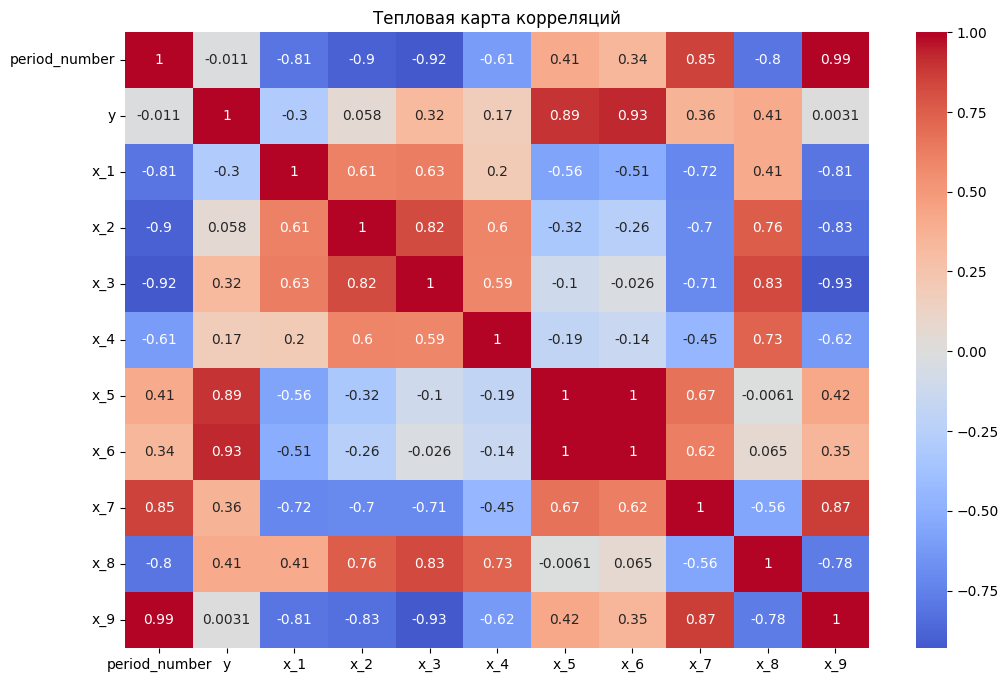

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций')
plt.show()

In [ ]:
# Разделение на признаки и целевую переменную
X = df[['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9']]
y = df['y']

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Прогноз и оценка
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R² = {r2:.4f}')
print('\nКоэффициенты модели:')
for i, col in enumerate(X.columns):
    print(f'{col}: {model.coef_[i]:.4f}')
print(f'Intercept: {model.intercept_:.4f}')

R² = 1.0000

Коэффициенты модели:
x_1: -25463408.5348
x_2: -19898024.0216
x_3: -15778951.0847
x_4: -0.0025
x_5: -1.7983
x_6: 1.5374
x_7: 0.5000
x_8: -0.0230
x_9: -10.1863
Intercept: 7552600604.6103


In [ ]:
mse_sklearn = mean_squared_error(y, y_pred)
r2_sklearn = r2_score(y, y_pred)
print(mse_sklearn)
print(r2_sklearn)

29.78511326223078
0.9999999999999931


   period_number          y        y_pred
0              1  209482510  2.094825e+08
1              2   -3822648 -3.822645e+06
2              3   -4556210 -4.556218e+06
3              4    2370197  2.370192e+06
4              5    7437978  7.437981e+06
5              6   41148354  4.114836e+07
6              7   59248761  5.924876e+07
7              8   72464052  7.246405e+07
8              9  106641173  1.066412e+08

R² (коэффициент детерминации): 1.0000
MSE (среднеквадратичная ошибка): 29.79


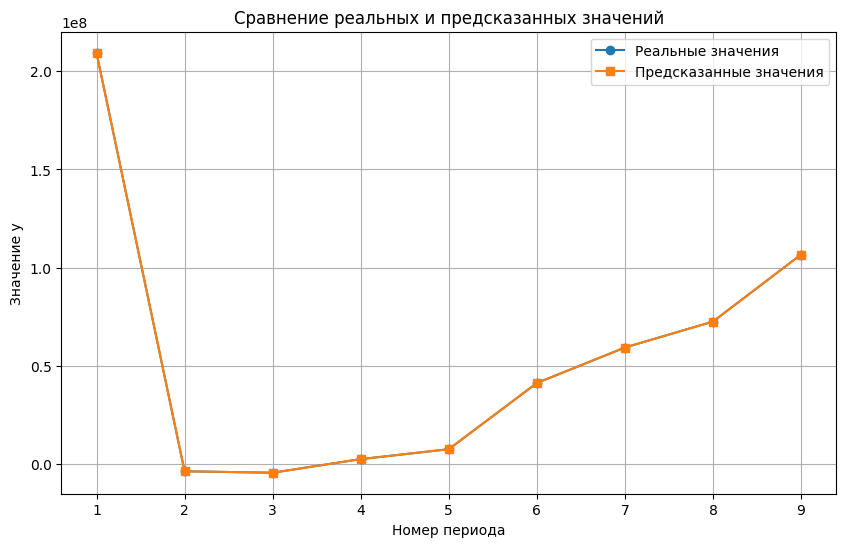

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Загрузка данных
url = "https://raw.githubusercontent.com/antipovaya/multi-factor_regression_model_of_a_bank-s_net_profit/main/one_bank.xlsx"
df = pd.read_excel(url, sheet_name='Лист1')

# Выделяем признаки и целевую переменную
X = df.drop(['period_number', 'y'], axis=1)  # Убираем номер периода и целевую переменную
y = df['y']

# Создаем и обучаем модель
model = LinearRegression()
model.fit(X, y)

# Предсказание
y_pred = model.predict(X)

# Добавим предсказания в исходный DataFrame для сравнения
df['y_pred'] = y_pred

# Выведем таблицу с реальными и предсказанными значениями
print(df[['period_number', 'y', 'y_pred']])

# Вычислим метрики
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\nR² (коэффициент детерминации): {r2:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.2f}")

# Построим график сравнения
plt.figure(figsize=(10, 6))
plt.plot(df['period_number'], df['y'], label='Реальные значения', marker='o')
plt.plot(df['period_number'], df['y_pred'], label='Предсказанные значения', marker='s')
plt.xlabel('Номер периода')
plt.ylabel('Значение y')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Загрузка данных
url = "https://raw.githubusercontent.com/antipovaya/multi-factor_regression_model_of_a_bank-s_net_profit/main/bank.xlsx"
df = pd.read_excel(url, sheet_name='Лист1')

=== ЗАГРУЗКА И АНАЛИЗ ДАННЫХ ===
Исходный размер данных: (66, 11)
После удаления x_7: (66, 10)
Удалено строк с y=0: 0
Выбросы y: 10 строк
Границы: [-40114364.25, 97057203.75]
После удаления выбросов: (56, 10)


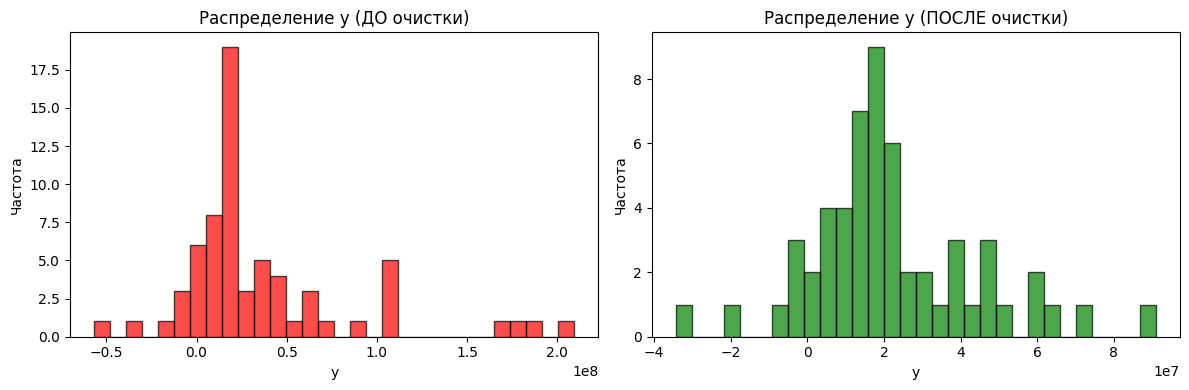


=== ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ ===


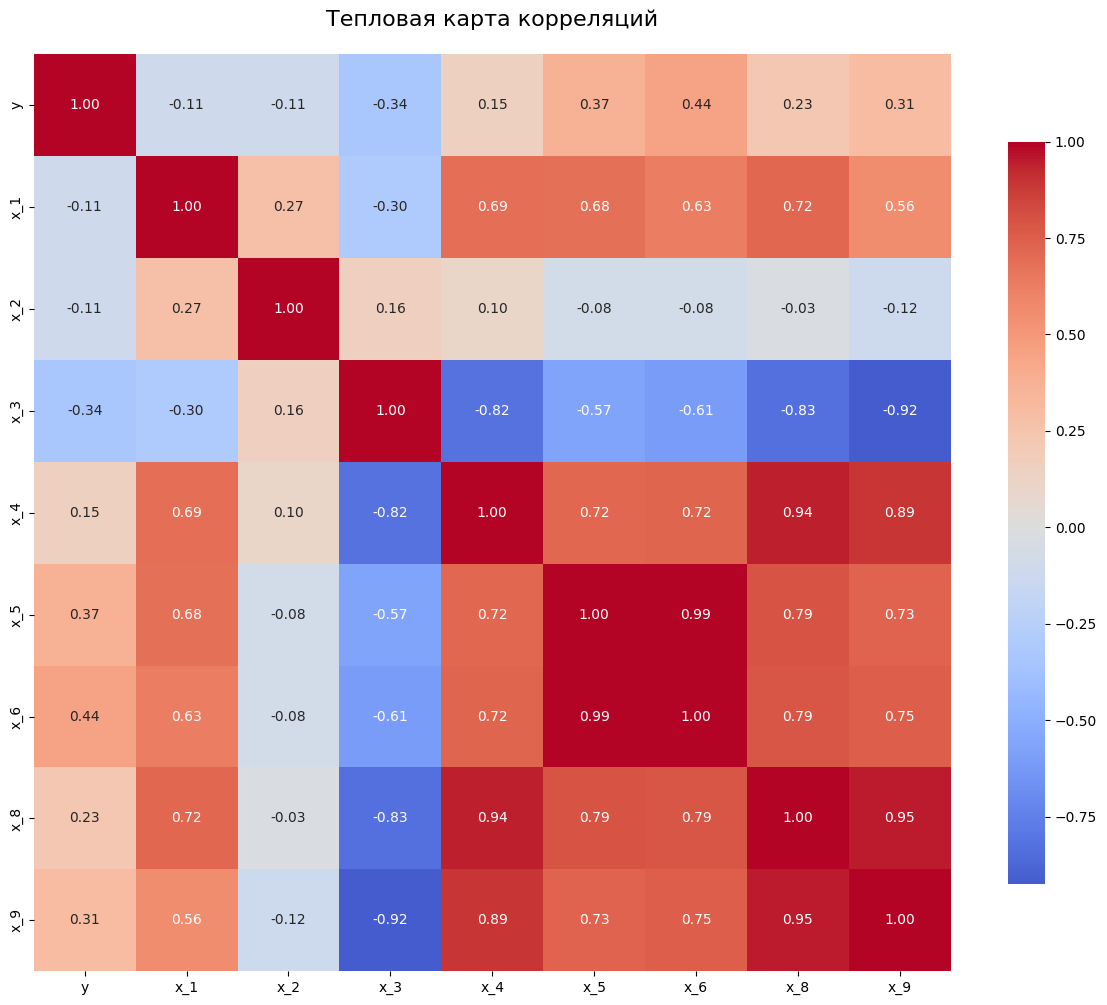


Корреляция признаков с y:
  x_6: 0.444
  x_5: 0.375
  x_9: 0.308
  x_8: 0.230
  x_4: 0.152
  x_1: -0.107
  x_2: -0.108
  x_3: -0.344

=== ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ ===
Признаки: ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_8', 'x_9']
X shape: (56, 8), y shape: (56,)
Обучающая выборка: 44 строк
Тестовая выборка: 12 строк

=== СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛЕЙ ===

--- Linear Regression ---
R²: 0.6352
RMSE: 12684025.29
MAE: 10068276.46
CV R²: -13.7182 (±22.4318)

--- Ridge Regression ---
R²: 0.6854
RMSE: 11779275.37
MAE: 9745586.41
CV R²: -0.6508 (±1.1317)

--- Lasso Regression ---
R²: 0.6354
RMSE: 12679223.13
MAE: 10058297.07
CV R²: -13.6980 (±22.4055)

--- Random Forest ---
R²: 0.6536
RMSE: 12358962.57
MAE: 10086665.95
CV R²: -0.7811 (±1.1808)

--- Gradient Boosting ---
R²: 0.7734
RMSE: 9996863.03
MAE: 8913084.00
CV R²: -1.1256 (±1.6530)

=== ВЫБОР ЛУЧШЕЙ МОДЕЛИ ===
✅ ЛУЧШАЯ МОДЕЛЬ: Gradient Boosting
R²: 0.7734
RMSE: 9996863.03
MAE: 8913084.00

=== ДЕТАЛЬНЫЙ АНАЛИЗ Gradient Boosting ===

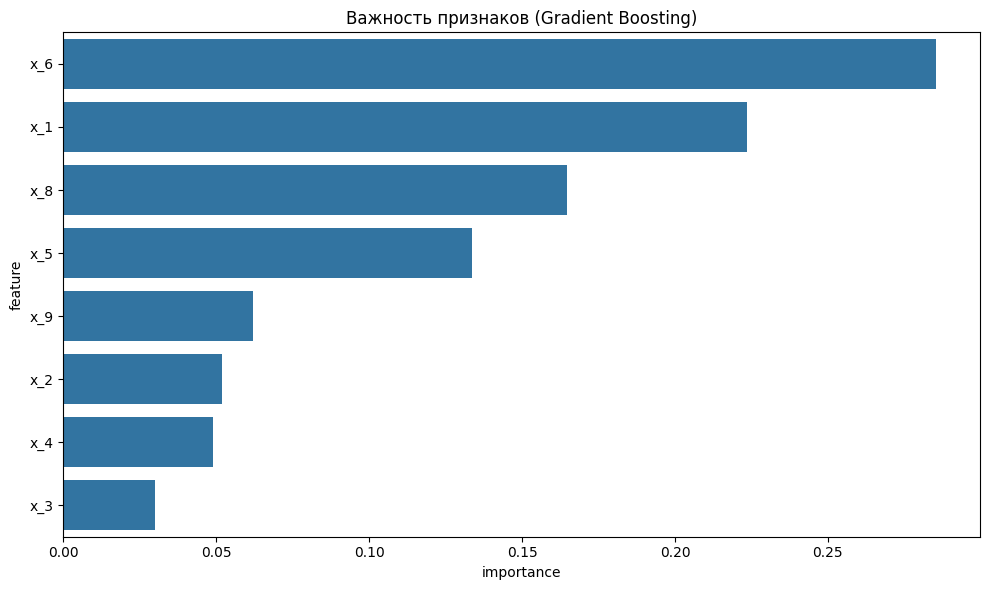

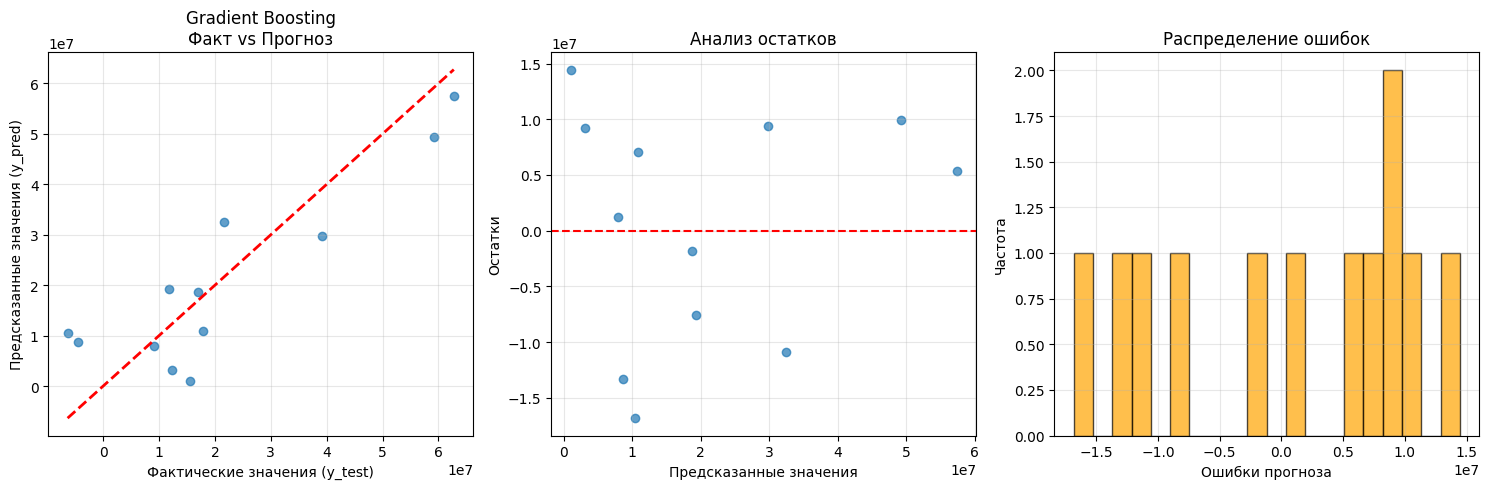


Сравнение прогнозов (Gradient Boosting):
    Фактическое  Предсказанное       Ошибка  Относительная_ошибка_%
0      15478177     1021985.67  14456191.33                   93.40
5       9195417     7973781.45   1221635.55                   13.29
35     17957378    10917415.13   7039962.87                   39.20
13     39162309    29792082.85   9370226.15                   23.93
19     11742483    19286036.64  -7543553.64                   64.24
59     -4556210     8712311.12 -13268521.12                  291.22
38     21579328    32501540.68 -10922212.68                   50.61
26     -6348649    10475420.42 -16824069.42                  265.00
46     62749493    57414865.68   5334627.32                    8.50
12     16924457    18704566.23  -1780109.23                   10.52

=== ИТОГОВАЯ СТАТИСТИКА ===
Лучшая модель: Gradient Boosting
Качество модели (R²): 0.7734
Средняя абсолютная ошибка: 8913084.00
Количество признаков: 8
Использованные признаки: ['x_1', 'x_2', 'x_3', 'x_4', 'x_

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
print("=== ЗАГРУЗКА И АНАЛИЗ ДАННЫХ ===")
print(f"Исходный размер данных: {df.shape}")

# 1. УДАЛЕНИЕ СТОЛБЦА x_7 (ВСЕ ЗНАЧЕНИЯ 0)
df_clean = df.drop('x_7', axis=1)
print(f"После удаления x_7: {df_clean.shape}")

# 2. УДАЛЕНИЕ СТРОК С y = 0
y_zeros_before = (df_clean['y'] == 0).sum()
df_clean = df_clean[df_clean['y'] != 0]
print(f"Удалено строк с y=0: {y_zeros_before}")

# 3. УДАЛЕНИЕ ВЫБРОСОВ ПО y МЕТОДОМ IQR
def remove_outliers_iqr(df, column='y'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Выбросы {column}: {len(outliers)} строк")
    print(f"Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")

    return df_clean

df_clean = remove_outliers_iqr(df_clean, 'y')
print(f"После удаления выбросов: {df_clean.shape}")

# Визуализация распределения y до и после очистки
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['y'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Распределение y (ДО очистки)')
plt.xlabel('y')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df_clean['y'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Распределение y (ПОСЛЕ очистки)')
plt.xlabel('y')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# 4. ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ
print("\n=== ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ ===")

# Выбираем только числовые столбцы
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляций', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Анализ корреляций с целевой переменной
correlation_with_y = correlation_matrix['y'].sort_values(ascending=False)
print("\nКорреляция признаков с y:")
for feature, corr in correlation_with_y.items():
    if feature != 'y':
        print(f"  {feature}: {corr:.3f}")

# 5. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ
print("\n=== ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ ===")

# Исключаем period_number и y из признаков, остальные все используем
features = [col for col in df_clean.columns if col not in ['period_number', 'y']]
X = df_clean[features]
y = df_clean['y']

print(f"Признаки: {features}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Обучающая выборка: {X_train.shape[0]} строк")
print(f"Тестовая выборка: {X_test.shape[0]} строк")

# 6. СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛЕЙ
print("\n=== СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛЕЙ ===")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")

    # Обучение модели
    model.fit(X_train, y_train)

    # Прогноз на тестовых данных
    y_pred = model.predict(X_test)

    # Метрики качества
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Кросс-валидация
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

    results[name] = {
        'model': model,
        'r2': r2,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }

    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# 7. ВЫБОР ЛУЧШЕЙ МОДЕЛИ
print("\n=== ВЫБОР ЛУЧШЕЙ МОДЕЛИ ===")
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
best_results = results[best_model_name]

print(f"✅ ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"R²: {best_results['r2']:.4f}")
print(f"RMSE: {best_results['rmse']:.2f}")
print(f"MAE: {best_results['mae']:.2f}")

# 8. ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ
print(f"\n=== ДЕТАЛЬНЫЙ АНАЛИЗ {best_model_name} ===")

# Важность признаков
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Важность признаков:")
    print(feature_importance)

    # Визуализация важности признаков
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Важность признаков ({best_model_name})')
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'feature': features,
        'coefficient': best_model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)

    print("Коэффициенты модели:")
    print(feature_importance)

# 9. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ЛУЧШЕЙ МОДЕЛИ
y_pred_best = results[best_model_name]['y_pred']

plt.figure(figsize=(15, 5))

# График 1: Фактические vs Предсказанные значения
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title(f'{best_model_name}\nФакт vs Прогноз')
plt.grid(True, alpha=0.3)

# График 2: Остатки
residuals = y_test - y_pred_best
plt.subplot(1, 3, 2)
plt.scatter(y_pred_best, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков')
plt.grid(True, alpha=0.3)

# График 3: Распределение ошибок
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Ошибки прогноза')
plt.ylabel('Частота')
plt.title('Распределение ошибок')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. ТАБЛИЦА СРАВНЕНИЯ ПРОГНОЗОВ
comparison_df = pd.DataFrame({
    'Фактическое': y_test.values,
    'Предсказанное': y_pred_best,
    'Ошибка': residuals,
    'Относительная_ошибка_%': np.abs(residuals / y_test.values) * 100
}).round(2)

print(f"\nСравнение прогнозов ({best_model_name}):")
print(comparison_df.head(10))

# 11. ИТОГОВАЯ СТАТИСТИКА
print(f"\n=== ИТОГОВАЯ СТАТИСТИКА ===")
print(f"Лучшая модель: {best_model_name}")
print(f"Качество модели (R²): {best_results['r2']:.4f}")
print(f"Средняя абсолютная ошибка: {best_results['mae']:.2f}")
print(f"Количество признаков: {len(features)}")
print(f"Использованные признаки: {features}")

# 12. СОХРАНЕНИЕ МОДЕЛИ ДЛЯ ДАЛЬНЕЙШЕГО ИСПОЛЬЗОВАНИЯ
final_model = best_model
final_scaler = scaler

print(f"\n✅ МОДЕЛЬ ГОТОВА К ИСПОЛЬЗОВАНИЮ!")
print(f"Для прогноза используйте: final_model.predict(final_scaler.transform(new_data))")

# Дополнительно: прогноз на всех данных
y_pred_all = final_model.predict(X_scaled)
overall_r2 = r2_score(y, y_pred_all)
print(f"Качество на всех данных: R² = {overall_r2:.4f}")